In [1]:
import sys
import os
import random
from collections import Counter
import numpy as np
# Package
import somhos.resources.dataset as rd
import somhos.resources.queries as rq
from somhos.methods.useful import save_pickle, load_pickle
from somhos.config.paths import *

Default path

In [2]:
data_path = "../../src/somhos/resources/aminer/v9"

Load samples

In [3]:
# Load sample A
docs_sample_a_path = get_relative_path(data_path, DOCS_SAMPLE_A_SUFFIX)
docs_sample_a = load_pickle(docs_sample_a_path)
# Load sample B
docs_sample_b_path = get_relative_path(data_path, DOCS_SAMPLE_B_SUFFIX)
docs_sample_b = load_pickle(docs_sample_b_path)

print("Samples size: (%d, %d)" % (len(docs_sample_a), len(docs_sample_b)))

Samples size: (1000, 1000)


Load samples content

In [4]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 2000


Load Jaccard similarities

In [5]:
docs_samples_jaccard_sim_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM)
m_jaccard_sim = load_pickle(docs_samples_jaccard_sim_path)
print(m_jaccard_sim)

docs_samples_jaccard_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV)
m_udv_jaccard_sim = load_pickle(docs_samples_jaccard_sim_udv_path)
print(m_udv_jaccard_sim)

[[0.03292181 0.03518519 0.00714286 ... 0.04385965 0.02083333 0.04580153]
 [0.04471545 0.0291439  0.02797203 ... 0.05627706 0.00657895 0.03623188]
 [0.03508772 0.02448211 0.008      ... 0.04205607 0.04761905 0.05172414]
 ...
 [0.03508772 0.01492537 0.02439024 ... 0.04205607 0.03125    0.02521008]
 [0.0361991  0.03468208 0.01709402 ... 0.04854369 0.02459016 0.        ]
 [0.05172414 0.01845018 0.         ... 0.03125    0.02189781 0.03174603]]
[[0.04361271 0.0460296  0.02870448 ... 0.04959599 0.02688767 0.03650811]
 [0.03771801 0.03980823 0.02482477 ... 0.04289259 0.02325353 0.03157367]
 [0.04338416 0.04578839 0.02855405 ... 0.04933609 0.02674677 0.03631679]
 ...
 [0.03332177 0.03516837 0.02193131 ... 0.03789323 0.02054321 0.02789359]
 [0.03247137 0.03427084 0.02137161 ... 0.03692616 0.02001893 0.02718172]
 [0.03512217 0.03706854 0.02311628 ... 0.03994062 0.02165317 0.02940069]]


Load jaccard similarities with keyphrases

In [6]:
docs_samples_jaccard_sim_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_KPS)
m_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_kps_path)
print(m_jaccard_sim_kps)

docs_samples_jaccard_sim_udv_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV_KPS)
m_udv_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_udv_kps_path)
print(m_udv_jaccard_sim_kps)

[[0.         0.         0.         ... 0.01960784 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01785714 0.         0.02857143]
 ...
 [0.         0.         0.         ... 0.         0.03846154 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02040816 0.         0.         ... 0.         0.         0.        ]]
[[0.00088732 0.00074947 0.00072513 ... 0.00090514 0.00039251 0.00080765]
 [0.00178591 0.00150847 0.00145948 ... 0.00182178 0.00079    0.00162555]
 [0.00490652 0.00414428 0.00400969 ... 0.00500508 0.00217041 0.00446596]
 ...
 [0.00330685 0.00279312 0.00270241 ... 0.00337327 0.00146279 0.00300993]
 [0.00058503 0.00049415 0.0004781  ... 0.00059678 0.00025879 0.0005325 ]
 [0.00360416 0.00304425 0.00294538 ... 0.00367656 0.00159431 0.00328055]]


Load cosine similarity with vectors of TF-IDF

In [7]:
docs_samples_tf_idf_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF)
m_tf_idf = load_pickle(docs_samples_tf_idf_path)
print(m_tf_idf)

docs_samples_tf_idf_udv_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_UDV)
m_udv_tf_idf = load_pickle(docs_samples_tf_idf_udv_path)
print(m_udv_tf_idf)

[[0.00750679 0.01106243 0.00031596 ... 0.00968403 0.0032995  0.00496262]
 [0.0157523  0.01400749 0.03310009 ... 0.01981849 0.00143613 0.00954822]
 [0.00522653 0.00838618 0.00083333 ... 0.02829378 0.00507733 0.01066712]
 ...
 [0.0074064  0.00825712 0.00714255 ... 0.01280274 0.00424296 0.00496312]
 [0.00849982 0.01319539 0.00128268 ... 0.02281991 0.00201917 0.        ]
 [0.01844931 0.00421175 0.         ... 0.01321121 0.00665555 0.00863887]]
[[0.01353857 0.02039515 0.0128373  ... 0.02081429 0.00554584 0.00883632]
 [0.01443389 0.02174391 0.01368625 ... 0.02219076 0.00591259 0.00942068]
 [0.01512196 0.02278044 0.01433868 ... 0.0232486  0.00619445 0.00986976]
 ...
 [0.01451197 0.02186152 0.01376028 ... 0.02231079 0.00594457 0.00947163]
 [0.0078894  0.01188498 0.00748075 ... 0.01212922 0.00323176 0.00514924]
 [0.0144247  0.02173006 0.01367753 ... 0.02217663 0.00590883 0.00941468]]


Load cosine similarities with TF-IDF vectors from keyphrases 

In [8]:
docs_samples_tf_idf_kps_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_KPS)
m_tf_idf_kps = load_pickle(docs_samples_tf_idf_kps_path)
print(m_tf_idf_kps)

docs_samples_tf_idf_kps_udv_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_UDV_KPS)
m_udv_tf_idf_kps = load_pickle(docs_samples_tf_idf_kps_udv_path)
print(m_udv_tf_idf_kps)

[[0.         0.         0.         ... 0.01244969 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01317411 0.         0.00451545]
 ...
 [0.         0.         0.         ... 0.         0.00371959 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00627728 0.         0.         ... 0.         0.         0.        ]]
[[4.73592033e-04 2.61405156e-03 6.42965835e-04 ... 1.01932404e-03
  1.88485822e-04 5.07716514e-04]
 [7.72944305e-04 4.26636455e-03 1.04937741e-03 ... 1.66362746e-03
  3.07625621e-04 8.28638492e-04]
 [1.35137968e-03 7.45911228e-03 1.83468239e-03 ... 2.90860846e-03
  5.37838249e-04 1.44875279e-03]
 ...
 [3.77351905e-04 2.08284191e-03 5.12306722e-04 ... 8.12183992e-04
  1.50183025e-04 4.04541842e-04]
 [2.41010698e-04 1.33028925e-03 3.27204922e-04 ... 5.18733384e-04
  9.59203205e-05 2.58376625e-04]
 [1.54619475e-03 8.53441887e-03 2.09917044e-03 ... 3.327

Load cosine similarity with centroids of word2vec

In [9]:
docs_samples_word2vec_sim_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM)
m_word2vec_sim = load_pickle(docs_samples_word2vec_sim_path)
print(m_word2vec_sim)

docs_samples_word2vec_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_UDV)
m_udv_word2vec_sim = load_pickle(docs_samples_word2vec_sim_udv_path)
print(m_udv_word2vec_sim)

[[0.86534196 0.86278559 0.79227646 ... 0.86958995 0.79866438 0.81544963]
 [0.87643462 0.89360271 0.83657274 ... 0.90201855 0.80954968 0.86228529]
 [0.84398758 0.84359904 0.83315985 ... 0.85875672 0.79936952 0.86560457]
 ...
 [0.81910398 0.82330639 0.78677141 ... 0.83295354 0.76034818 0.88402544]
 [0.83766927 0.85300346 0.71587968 ... 0.85768615 0.75476113 0.79618026]
 [0.84980335 0.82969595 0.79795486 ... 0.85606399 0.77727514 0.86805362]]
[[0.86128099 0.87603515 0.79645275 ... 0.87464476 0.78405023 0.83869546]
 [0.8768267  0.89184716 0.81082834 ... 0.89043168 0.79820196 0.85383351]
 [0.86250937 0.87728458 0.79758868 ... 0.8758922  0.78516846 0.83989163]
 ...
 [0.83569109 0.85000688 0.77278899 ... 0.8486578  0.76075496 0.81377661]
 [0.83460778 0.84890502 0.77178723 ... 0.84755769 0.7597688  0.81272171]
 [0.85664297 0.87131768 0.79216384 ... 0.86993478 0.7798281  0.83417907]]


In [10]:
docs_samples_word2vec_sim_kps_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_KPS)
m_word2vec_sim_kps = load_pickle(docs_samples_word2vec_sim_kps_path)
print(m_word2vec_sim_kps)

docs_samples_word2vec_sim_kps_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_UDV_KPS)
m_udv_word2vec_sim_kps = load_pickle(docs_samples_word2vec_sim_kps_udv_path)
print(m_udv_word2vec_sim_kps)

[[0.73584551 0.74774643 0.70017648 ... 0.71498831 0.59425368 0.66057425]
 [0.7529434  0.79520642 0.61637561 ... 0.74657731 0.58591201 0.66758565]
 [0.67955684 0.70658729 0.69086082 ... 0.7408391  0.62025059 0.75199539]
 ...
 [0.64550431 0.70693401 0.57462293 ... 0.68213468 0.56961568 0.65312854]
 [0.61921492 0.68430302 0.44202702 ... 0.63422805 0.64957497 0.59564065]
 [0.68590205 0.73472731 0.62482526 ... 0.73951819 0.66878865 0.73156019]]
[[0.70249156 0.76503067 0.61917123 ... 0.73742336 0.63819848 0.67459647]
 [0.713463   0.77697885 0.62884139 ... 0.74894037 0.6481658  0.68513226]
 [0.7221335  0.78642124 0.6364835  ... 0.75804201 0.65604276 0.69345846]
 ...
 [0.6631624  0.72220025 0.58450678 ... 0.69613853 0.60246878 0.63682902]
 [0.60632752 0.66030566 0.53441291 ... 0.63647751 0.55083552 0.58225099]
 [0.7176664  0.78155645 0.63254623 ... 0.75335278 0.65198449 0.68916874]]


In [11]:
docs_samples_word2vec_tfidf_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF)
m_word2vec_tfidf = load_pickle(docs_samples_word2vec_tfidf_path)
print(m_word2vec_tfidf)

docs_samples_word2vec_tfidf_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_UDV)
m_udv_word2vec_tfidf = load_pickle(docs_samples_word2vec_tfidf_udv_path)
print(m_udv_word2vec_tfidf)

[[0.65111072 0.70310882 0.65259718 ... 0.72468738 0.52235828 0.54822528]
 [0.70137091 0.80561423 0.71719402 ... 0.78705137 0.57018362 0.61170953]
 [0.68522791 0.69460987 0.69879183 ... 0.73962227 0.56383926 0.70678924]
 ...
 [0.65779476 0.75228731 0.68471401 ... 0.78790058 0.57673746 0.74272504]
 [0.59932566 0.66580782 0.49443457 ... 0.67596839 0.6500183  0.55437951]
 [0.71192622 0.68136118 0.65052729 ... 0.74431948 0.55242311 0.65809202]]
[[0.66773104 0.72935469 0.63675897 ... 0.73157146 0.55387421 0.61209168]
 [0.71649824 0.78262252 0.68326415 ... 0.78500118 0.59432596 0.6567953 ]
 [0.69120158 0.75499128 0.65914085 ... 0.75728597 0.57334271 0.63360651]
 ...
 [0.70452175 0.76954075 0.67184318 ... 0.77187965 0.58439162 0.64581677]
 [0.59513725 0.65006135 0.56753237 ... 0.65203712 0.4936586  0.54554684]
 [0.7017605  0.76652467 0.66921001 ... 0.7688544  0.5821012  0.6432856 ]]


In [12]:
docs_samples_word2vec_tfidf_kps_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_KPS)
m_word2vec_tfidf_kps = load_pickle(docs_samples_word2vec_tfidf_kps_path)
print(m_word2vec_tfidf_kps)

docs_samples_word2vec_tfidf_kps_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_TFIDF_UDV_KPS)
m_udv_word2vec_tfidf_kps = load_pickle(docs_samples_word2vec_tfidf_kps_udv_path)
print(m_udv_word2vec_tfidf_kps)

[[0.43115028 0.54634225 0.51371095 ... 0.51008934 0.2913128  0.38669381]
 [0.53935693 0.74775339 0.4639082  ... 0.62689215 0.42685427 0.46811497]
 [0.47276884 0.58106644 0.52075612 ... 0.60518409 0.4051908  0.60488185]
 ...
 [0.3643233  0.60972315 0.43664798 ... 0.57395037 0.35191613 0.50837997]
 [0.44619979 0.52402713 0.26508918 ... 0.43225973 0.65464446 0.47329157]
 [0.4767633  0.64211708 0.51579008 ... 0.67357213 0.44694537 0.55012258]]
[[0.42301795 0.57503812 0.41932352 ... 0.54249371 0.39724739 0.44289797]
 [0.52300512 0.71095772 0.51843745 ... 0.67072092 0.49114326 0.54758411]
 [0.49526525 0.67324896 0.49093984 ... 0.63514629 0.46509332 0.51854058]
 ...
 [0.44335411 0.60268249 0.43948207 ... 0.56857354 0.41634465 0.46418984]
 [0.3652919  0.49656703 0.36210162 ... 0.46846371 0.34303805 0.38245905]
 [0.52350031 0.71163086 0.51892831 ... 0.67135596 0.49160828 0.54810257]]


Means to order matrices

In [13]:
# m_ref = m_jaccard_sim
# m_ref_udv = m_udv_jaccard_sim
m_ref = m_jaccard_sim_kps
# m_ref = m_word2vec_sim
# m_ref = m_word2vec_sim_kps
# m_ref = m_word2vec_tfidf_kps
# m_ref_udv = m_udv_word2vec_sim_kps

# Means sample a
means_sample_a = np.divide(np.sum(m_ref, axis=1), len(docs_sample_b))
# Means sample b
means_sample_b = np.divide(np.sum(m_ref, axis=0), len(docs_sample_a))
# Ordered means
ordered_indices_m = means_sample_a.argsort()[::-1]
ordered_indices_n = means_sample_b.argsort()[::-1]

docs_sample_a = list(np.array(docs_sample_a)[ordered_indices_m])
docs_sample_b = list(np.array(docs_sample_b)[ordered_indices_n])

Order matrices by means

In [14]:
m_ref = m_ref[ordered_indices_m,:][:,ordered_indices_n]
# m_ref_udv = m_ref_udv[ordered_indices_m,:][:,ordered_indices_n]

m_jaccard_sim = m_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim = m_udv_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_jaccard_sim_kps = m_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim_kps = m_udv_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
# TF-IDF 
m_tf_idf = m_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
m_udv_tf_idf = m_udv_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
m_tf_idf_kps = m_tf_idf_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_tf_idf_kps = m_udv_tf_idf_kps[ordered_indices_m,:][:,ordered_indices_n]
# Word2vec
m_word2vec_sim = m_word2vec_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_sim = m_udv_word2vec_sim[ordered_indices_m,:][:,ordered_indices_n]
m_word2vec_sim_kps = m_word2vec_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_sim_kps = m_udv_word2vec_sim_kps[ordered_indices_m,:][:,ordered_indices_n]

m_word2vec_tfidf = m_word2vec_tfidf[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_tfidf = m_udv_word2vec_tfidf[ordered_indices_m,:][:,ordered_indices_n]
m_word2vec_tfidf_kps = m_word2vec_tfidf_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_tfidf_kps = m_udv_word2vec_tfidf_kps[ordered_indices_m,:][:,ordered_indices_n]

In [15]:
matrices = [
    (m_jaccard_sim, "Jaccard similarities"),
    # (m_udv_jaccard_sim, "Jaccard similarities UDV'"),
    (m_jaccard_sim_kps, "Jaccard similarities (keyphrases)"),
    # (m_udv_jaccard_sim_kps, "Jaccard similarities UDV' (keyphrases)"),
    (m_tf_idf, "TF-IDF"),
    # (m_udv_tf_idf, "TF-IDF UDV'"),
    (m_tf_idf_kps, "TF-IDF (Keyphrases)"),
    # (m_udv_tf_idf_kps, "TF-IDF UDV' (Keyphrases)"),
    (m_word2vec_sim, "Word2vec similarities"),
    # (m_udv_word2vec_sim, "Word2vec similarities UDV'"),
    (m_word2vec_sim_kps, "Word2vec similarities (keyphrases)"),
    # (m_udv_word2vec_sim_kps, "Word2vec similarities UDV' (keyphrases)"),
    (m_word2vec_tfidf, "Word2vec similarities TF-IDF"),
    # (m_udv_word2vec_tfidf_kps, "Word2vec similarities TF-IDF UDV'"),
    (m_word2vec_tfidf_kps, "Word2vec similarities TF-IDF(keyphrases)")
    # (m_udv_word2vec_tfidf_kps, "Word2vec similarities TF-IDF UDV' (keyphrases)")
]

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['image.interpolation'] = 'none'
mpl.rcParams['image.lut'] = 2
mpl.rcParams['image.resample'] = False

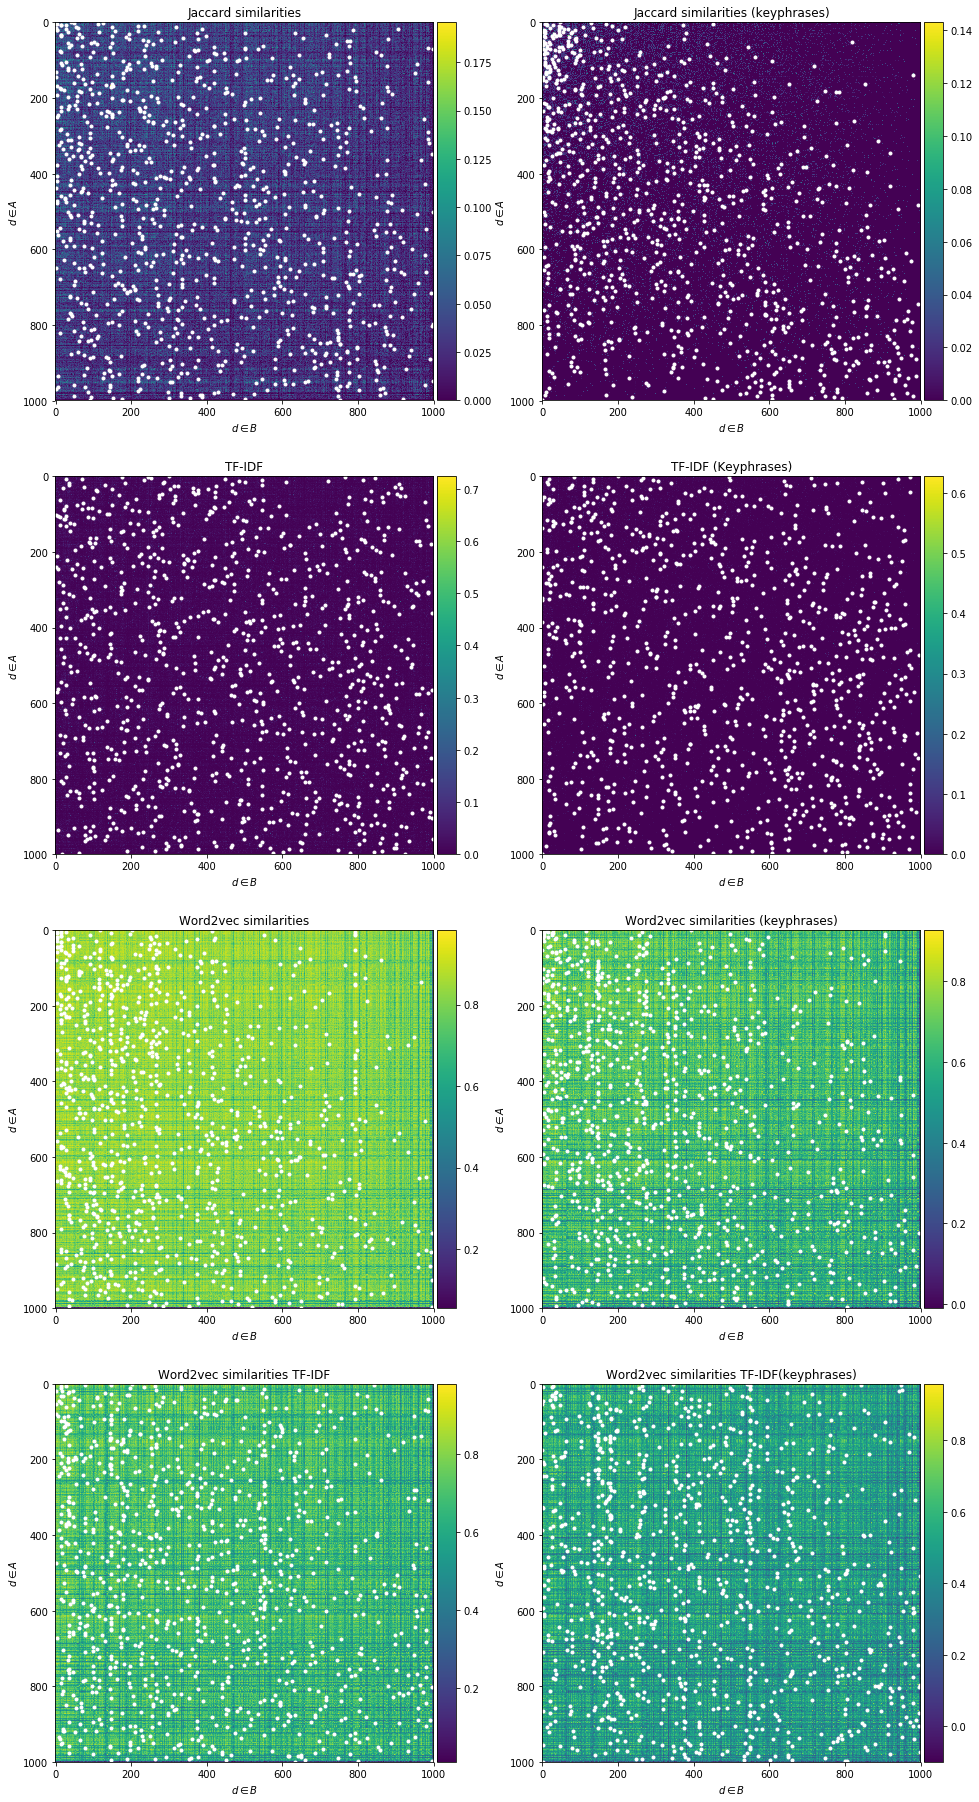

In [17]:
nrows = 4
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 32))
# fig.suptitle("Matrices")

matrices_iter = iter(matrices)
for pos_x in range(0, nrows):
    for pos_y in range(0, ncols):
        matrix, title = next(matrices_iter)
        data = matrix
        axes[pos_x][pos_y].set_title(title)
        # plt.colorbar(im_m, ax=axes[pos_x][pos_y])
        axes[pos_x][pos_y].set_xlabel(r'$d \in B$')
        axes[pos_x][pos_y].set_ylabel(r'$d \in A$')
        # data 
        im_m = axes[pos_x][pos_y].imshow(data)
        x, y = range(0, data.shape[0]), data.argmax(1)
        # x = 50
        # y = 400
        # iswap x, y for image 
        axes[pos_x][pos_y].plot(y, x, 'w.')
        # Divider
        divider = make_axes_locatable(axes[pos_x][pos_y])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        # Colorbar
        fig.colorbar(im_m, cax=cax, orientation='vertical')
# l b w h 
# cax = plt.axes([0.98, 0.1, 0.05, 0.8])
# plt.colorbar(im_jaccard_sim, cax=cax)
plt.show()

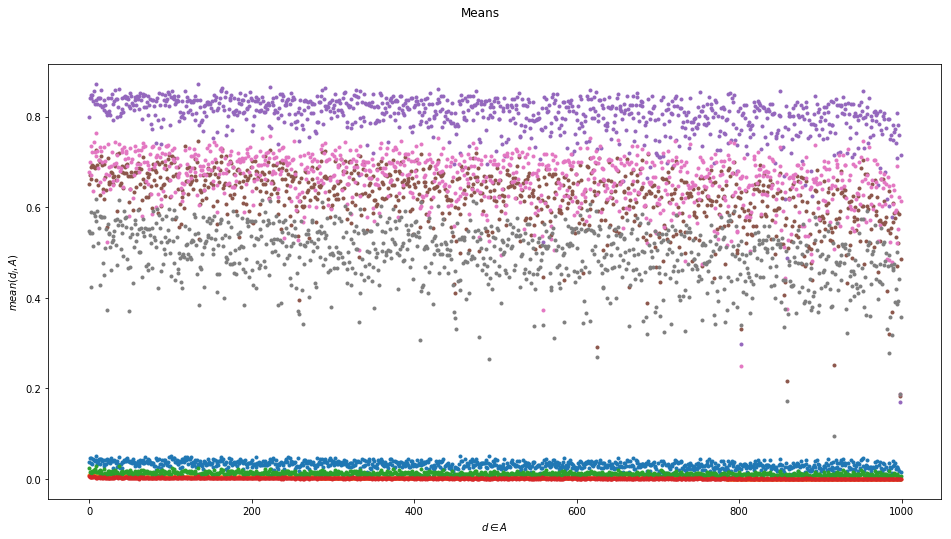

In [18]:
nrows = 1
ncols = 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))
fig.suptitle("Means")

for i, (matrix, title) in enumerate(matrices):
    data = matrix
    # plt.colorbar(im_m, ax=axes[pos_x][pos_y])
    axes.set_xlabel(r'$d \in A$')
    axes.set_ylabel(r'$mean(d_j, A)$')
    # data
    axes.plot(data.mean(1), '.')
    # axes.plot(data.mean(1) - data.var(1), ',') 
    # axes.plot(data.mean(1) + data.var(1), ',') 
plt.show()

In [19]:
mmm = np.array([
    [1, 2, 3],
    [5, 7, 9],
    [12, 15, 18]]
)

nnn = np.array([
    [30, 25, 20],
    [16, 12, 8],
    [6, 3, 0]]
)

def mean(X):
    EX = X.mean(1)
    return EX 

def subtract(X):
    EX = mean(X)
    subtract_X = np.subtract(X.transpose(), EX).transpose()
    return subtract_X

def sigma(X):
    subtract_X = subtract(X)
    sum_EX_EX = np.sum(subtract_X**2, 1)
    sigma_X = np.sqrt(np.divide(sum_EX_EX, (X.shape[1] - 1)))
    return sigma_X

def cov(X, Y):
    subtract_X = subtract(X)
    subtract_Y = subtract(Y)
    cov_XY = np.sum((subtract_X)*(subtract_Y), 1)/X.shape[0]
    return cov_XY

def pearson(X, Y):
    cov_XY = cov(X, Y)
    sigma_X = sigma(X)
    sigma_Y = sigma(Y)
    p = np.array([((cxy/(sigma_X*sigma_Y)[i]) if (sigma_X*sigma_Y)[i] != 0 else float('inf') ) for i, cxy in enumerate(cov_XY)])
    return p

print(cov(mmm, nnn), pearson(mmm, nnn))

[-3.33333333 -5.33333333 -6.        ] [-0.66666667 -0.66666667 -0.66666667]


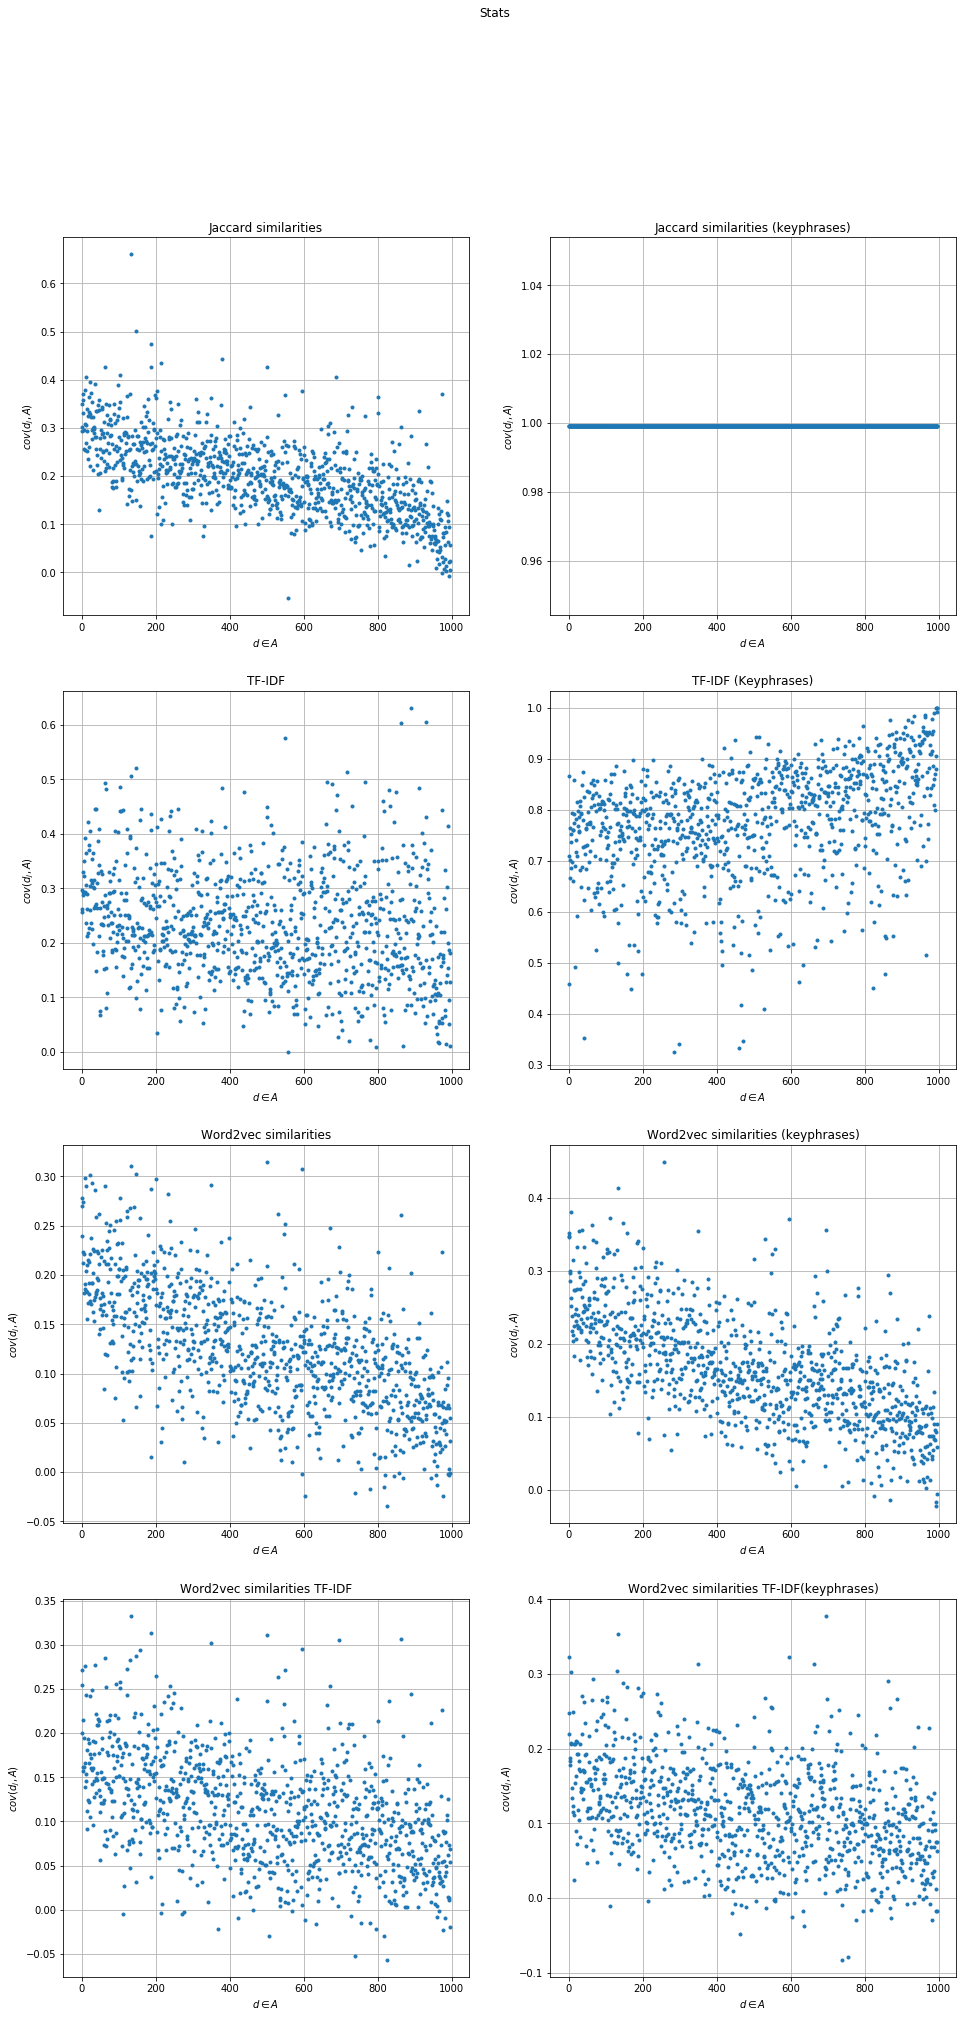

In [24]:
nrows = 4
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 32))
fig.suptitle("Stats")

X = m_ref 
matrices_iter = iter(matrices)
for i in range(0, nrows):
    for j in range(0, ncols):
        matrix, title = next(matrices_iter)
        Y = matrix
        # data
        # axes[i][j].plot(cov(X, Y), '.')
        axes[i][j].plot(pearson(X, Y), '.')
        axes[i][j].set_title(title)
        axes[i][j].set_xlabel(r'$d \in A$')
        axes[i][j].set_ylabel(r'$cov(d_j, A)$')
        axes[i][j].grid(True)
plt.show()

In [21]:
matrix = m_ref
print(matrix[range(0, matrix.shape[0]), matrix.argmax(1)][:10])
print(matrix.max(1)[:10])
print(matrix.argmax(1)[:10])
k = 3
part = np.argpartition(matrix, -k, axis=1)[:,-k:]
# print(part.transpose())
# np.array(list(matrix[i, j] for i, j in enumerate(part.transpose()[0])))

[0.07692308 0.12903226 0.07317073 0.09090909 0.07142857 0.06818182
 0.09375    0.10204082 0.05617978 0.06818182]
[0.07692308 0.12903226 0.07317073 0.09090909 0.07142857 0.06818182
 0.09375    0.10204082 0.05617978 0.06818182]
[ 46   8 128   7 452 168 372  27  12 184]


Get content

In [22]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 2000


Order docs and get less similar

In [23]:
matrix = m_ref

k = 3
part = np.argpartition(matrix, -k, axis=1)[:,-k:]
print(part.transpose())

for p in part.transpose():
    cnt = 0
    cnt_full = 0
    print("++++++++++++++++++++++")
    for i, j in zip(range(0, matrix.shape[0]), p):
        cnt_full += 1
        if m_jaccard_sim_kps[i, j] > 0.0:
            continue
        if cnt_full > 10:
            break
        cnt += 1
        doc_a = docs_sample_a[i]
        doc_b = docs_sample_b[j]
        content_a = samples_content[doc_a]
        content_b = samples_content[doc_b]
        # bow
        # bow = content_a['bag-of-words'] | content_b['bag-of-words']
        # kps
        # bok = content_a['bag-of-kps'] | content_b['bag-of-kps']
        # if m_jaccard_sim_kps[i,j] == 0.0 or len(bok) <= 6:
        #     continue
        # print("(%d, %d) = %f b-o-w" % (i, j, m_jaccard_sim[i,j]), bow if bow else "")
        # print("(%d, %d) = %f b-o-k" % (i, j, m_jaccard_sim_kps[i,j]), bok if bok else "")
        print(" (%f, %f, %f, %f, %f, %f)" % (m_jaccard_sim[i,j],
                                             m_jaccard_sim_kps[i,j],
                                             m_tf_idf[i,j],
                                             m_tf_idf_kps[i,j],
                                             m_word2vec_sim[i,j],
                                             m_word2vec_sim_kps[i,j]))
        print("\n", doc_a, content_a['title'])
        print("\n", sorted(content_a['bag-of-kps']))
        print("\n", doc_b, content_b['title'])
        print("\n", sorted(content_b['bag-of-kps']))
        print("\n (%d, %d) \n-------\n" % (cnt_full, cnt))

[[ 56 181 339 ... 331 332 332]
 [ 46 125  58 ... 332 334 334]
 [199   8 128 ... 451 999 999]]
++++++++++++++++++++++
++++++++++++++++++++++
++++++++++++++++++++++
